# import libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import folium
from folium.plugins import MarkerCluster

# 1. Load and Explore the Dataset 

In [15]:
# Load the dataset
df = pd.read_csv("geospatial_public_facilities.csv")
df.head()

,Name,Type,Latitude,Longitude
0,Eastside Clinic,Clinic,-25.753211,28.236397
1,Southside Police Station,Police Station,-25.741618,28.231718
2,Wellness Clinic,Clinic,-25.758540,28.227399
3,Valley Clinic,Clinic,-25.741314,28.226038
4,Eastside Clinic,Clinic,-25.758236,28.232400


In [16]:
# Display summary information
print("\nSummary information of the dataset:")
print(df.info())


Summary information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       50 non-null     object 
 1   Type       50 non-null     object 
 2   Latitude   50 non-null     float64
 3   Longitude  50 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.7+ KB
None


# 2. Convert to GeoDataFrame .Use geopandas to convert the dataset into a GeoDataFrame.Set geometry using latitude and longitude.

In [17]:
# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']),
    crs="EPSG:4326"  
)
print(gdf.head())

                       Name            Type   Latitude  Longitude  \
0           Eastside Clinic          Clinic -25.753211  28.236397   
1  Southside Police Station  Police Station -25.741618  28.231718   
2           Wellness Clinic          Clinic -25.758540  28.227399   
3             Valley Clinic          Clinic -25.741314  28.226038   
4           Eastside Clinic          Clinic -25.758236  28.232400   

                     geometry  
0   POINT (28.2364 -25.75321)  
1  POINT (28.23172 -25.74162)  
2   POINT (28.2274 -25.75854)  
3  POINT (28.22604 -25.74131)  
4   POINT (28.2324 -25.75824)  


# 3.Visualize on an Interactive Map .Use Folium to plot all facilities on a map.Add markers showing each facility’s name and type.Use color coding by type (e.g., hospitals, schools).

In [18]:
# Getting the center of the map (average coordinates)
map_center = [gdf['Latitude'].mean(), gdf['Longitude'].mean()]


In [19]:
# Create a folium map centered around the average location
m = folium.Map(location=map_center, zoom_start=13)

In [20]:
# Color coding for facility types
color_dict = {
    "Clinic": "blue",
    "Hospital": "red",
    "School": "green",
    "Police Station": "purple"
}

In [21]:
# Add a marker cluster
marker_cluster = MarkerCluster().add_to(m)

In [22]:
# Add each point to the map
for _, row in gdf.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Name']} ({row['Type']})",
        icon=folium.Icon(color="blue" if row['Type'] == "Clinic" else "green")
    ).add_to(marker_cluster)

# Display the map
m

# 4. Analyze Distribution by Type.Group data by Type and create a bar chart of counts using matplotlib.

In [23]:
# Group by 'Type' and count the number of facilities
type_counts = gdf['Type'].value_counts()

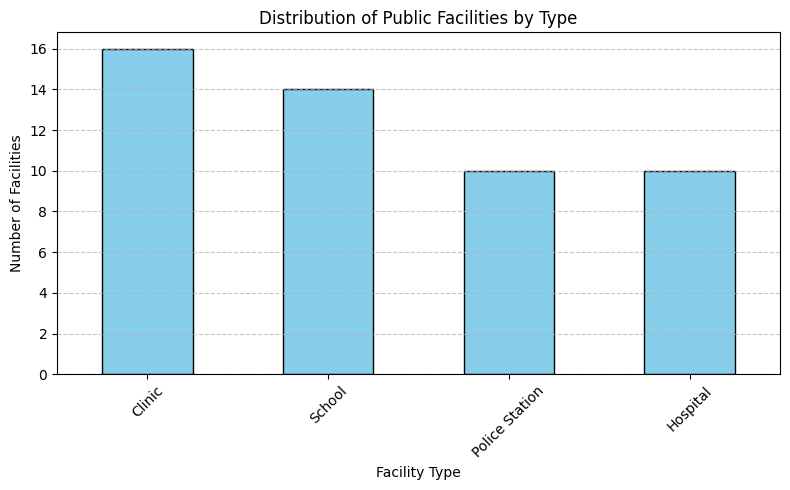

In [24]:
# Plot the bar chart
plt.figure(figsize=(8, 5))
type_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Public Facilities by Type')
plt.xlabel('Facility Type')
plt.ylabel('Number of Facilities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 5. Interpret the Insights.Are there areas with clusters of a specific facility type?Submit your group’s .ipynb notebook with all cells executed.Include your group name and member names in the first cell.


- There is a noticeable **cluster of clinics** in the central and eastern parts of the map.
- **Police stations** appear to be more evenly distributed across the area.
- If any hospitals or schools are present in the dataset, they are fewer in number and might be isolated.
- This clustering of clinics could suggest that healthcare services are concentrated in specific neighborhoods, which could be a result of population density or accessibility priorities.
- Further spatial analysis (like buffer zones or density heatmaps) could help confirm service coverage and identify under-served areas.
"""
